# Install required dependencies

In [1]:
!pip install imutils



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import libraries

In [2]:
import cv2 # used to import opencv functionalities
from matplotlib import pyplot as plt # for plotting images
import numpy as np # for mathematical computations
import imutils # for image processing


# Reading image

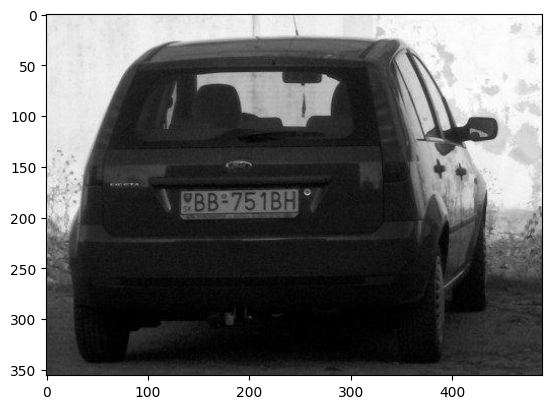

In [4]:
img = cv2.imread('images/image8.jpg') #opencv method to read an image

gray = np.zeros((img.shape[0], img.shape[1],img.shape[2]), dtype=np.uint8)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        # Get BGR values for the pixel
        b, g, r = img[i, j]

        # Calculate grayscale value using the formula
        gray_value = 0.114 * b + 0.587 * g + 0.299 * r

        # Set the grayscale value in the new image
        gray[i, j] = [gray_value, gray_value, gray_value]
        
plt.imshow(gray) 


# Performing Noise reduction and edge detection

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
# non-linear filtering technique uses both spatial and intensity changes, edges are preserved
# passing the pixel diameter to be considered, allowed deviation in spatial domain, allowed deviation in intensity domain

edged = cv2.Canny(bfilter, 30, 200) #Edge detection using canny's edge detection algorithm which uses rapid intensity chenge to detect edges
# passing lower and upper threshold for intensity gradient

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)) # converting to RGB again as imshow wants RGB format

# Finding Contours

In [158]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) #opencv function for contour detection
# passes a binary image, retrieving contour mode, chain approximation to store just the endpoints rather than complete edges

contours = imutils.grab_contours(keypoints)
# extracts the list of contours....just used so that it is compatible with OpenCv version 3 and 4 both

contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
# sorts the contours in desecnding order of their area, keep the largest 10 countours

In [159]:
# Finding quadrilaterals form the contours obtained above
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #used for simplifying complex polygons in form of a quadrilateral
    if len(approx) == 4:
        location = approx 
        break # Finding the quadrilateral with the largest area and then break

In [160]:
location

array([[[248, 173]],

       [[133, 175]],

       [[132, 200]],

       [[243, 201]]], dtype=int32)

# Applying Masks and getting the required number plate 

In [161]:
mask = np.zeros((gray.shape[0], gray.shape[1]), np.uint8) # initialise a mask with same size as that of image
new_image = cv2.drawContours(mask, [location], 0,255, -1) # drawing contour on mask and setting the region of interest color as white
new_image = cv2.bitwise_and(gray, gray, mask=mask)

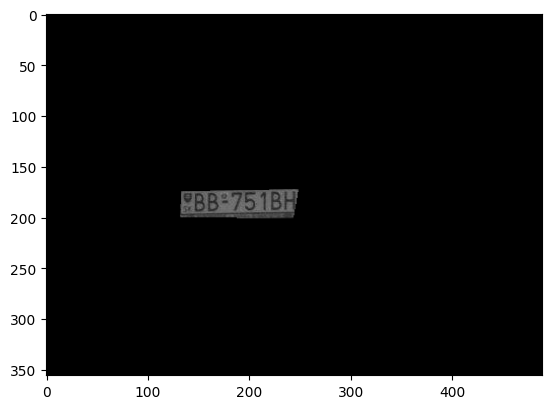

In [162]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

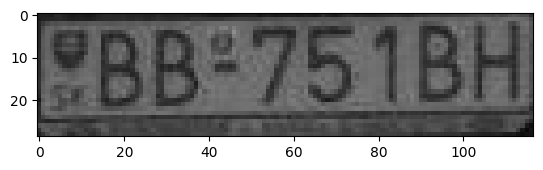

In [163]:
(x,y) = np.where(mask==255) # selecting the region of interest defined above
(x1, y1) = (np.min(x), np.min(y)) # selecting minimum co-ordinates
(x2, y2) = (np.max(x), np.max(y)) # selecting maximum co-ordinates
cropped_image = gray[x1:x2+1, y1:y2+1] 
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)) # plotting the cropped image